<a href="https://colab.research.google.com/github/RozminWaghu99/Customer-Churn-Analysis./blob/main/Customer_Churn_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Customer churn**

****
Customer churn is a fundamental problem for the telecommunication (Telco) industry. It is defined as the loss of customers moved from one Telco operator to another. If customer churn can be predicted in advance, such as “is this customer going to leave us within the next X months?”, Telco operators can apply business marketing policies to such churn customers to retain and increase the customer base. In particular, given millions of Telco customers, even reducing the 1% churn rate will lead to a significant profit increase.

We can roughly define the Churn analysis as the whole of analytical studies on “a customer”, “a product or service”, and “the probability of abandonment”. We aim to be aware of this situation (even the customer himself may not be aware of this situation) before the customer leaves us (approaching to leave) and then to take some preventive actions.

Telco churn data includes information about a fictitious telecom company that provided home phone and Internet services to 7,043 California customers in the third quarter. Which customers have left, stayed, or signed up for their service shows?

<img src="https://scontent.fbom3-2.fna.fbcdn.net/v/t39.30808-6/317306576_544649757676330_3733256563044219756_n.jpg?stp=dst-jpg_p843x403&_nc_cat=100&ccb=1-7&_nc_sid=730e14&_nc_ohc=nWzyHoYKBuMAX8ICvpF&tn=0f4upZFa0IPoZV7T&_nc_ht=scontent.fbom3-2.fna&oh=00_AfAB1N6Jvum3F1eHk06MiVr5No-1tukTBNnkAJkVSRc0hw&oe=639D82E2" style="float:right;">


# **Business Problem :**

It is desirable to develop a machine learning model that can predict customers who will leave the company. You are expected to perform the necessary data analysis and feature engineering steps before developing the model.


# **Description :**

- customerID - unique value identifying customer
- gender - whether the customer is a male or a female
- SeniorCitizen - whether the customer is a senior citizen or not (1, 0)
- Partner - whether the customer has a partner or not (Yes, No)
- Dependents - whether the customer has dependents or not (Yes, No). A dependent is a person who relies on another as a primary source of income,
- tenure - number of months the customer has stayed with the company
- PhoneService - whether the customer has a phone service or not (Yes, No)
- MultipleLines - whether the customer has multiple lines or not (Yes, No, No phone service)
- InternetService - customer’s internet service provider (DSL, Fiber optic, No)
- OnlineSecurity - whether the customer has online security or not (Yes, No, No internet service)
- OnlineBackup - whether the customer has online backup or not (Yes, No, No internet service)
- DeviceProtection - whether the customer has device protection or not (Yes, No, No internet service)
- TechSupport - whether the customer has tech support or not (Yes, No, No internet service)
- StreamingTV - whether the customer has streaming TV or not (Yes, No, No internet service)
- StreamingMovies - whether the customer has streaming movies or not (Yes, No, No internet service)
- Contract - type of contract according to duration (Month-to-month, One year, Two year)
- PaperlessBilling - bills issued in paperless form (Yes, No)
- PaymentMethod - payment method used by customer (Electronic check, Mailed check, Credit card (automatic), Bank transfer (automatic))
- MonthlyCharges - amount of charge for service on monthly bases
- TotalCharges - cumulative charges for service during subscription (tenure) period
- Churn – output value, predict variable

In [129]:
#Import modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#feature importance for feature selection
from sklearn.metrics import mutual_info_score
#imblearn data
from imblearn.over_sampling import SMOTE 
#normailizing our dataset using min max scaler
from sklearn.preprocessing import MinMaxScaler
# split the data in training and testing sets
from sklearn.model_selection import train_test_split
#models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,classification_report, accuracy_score, roc_curve, auc
from sklearn.metrics import roc_curve, auc,roc_auc_score

from matplotlib import pyplot
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix, classification_report, plot_roc_curve

import warnings
warnings.filterwarnings('ignore')


#mount google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#Loading reading teleco customer churn dataset
d = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML Project/Customer Churn Anaylsis /WA_Fn-UseC_-Telco-Customer-Churn.csv')
d.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# ***Exploratory Data Analysis & Data Cleaning***
****

# Inspect dataset

In [3]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


- Total rows : 7043
- Total columns : 21 
- numerical feartures: 3
- categorical features : 18

# Inspect Unique Values in each column

In [4]:
#check uniques values
for column in d.columns:
    print('Column: {} - Unique Values: {}'.format(column, d[column].unique()))

Column: customerID - Unique Values: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
Column: gender - Unique Values: ['Female' 'Male']
Column: SeniorCitizen - Unique Values: [0 1]
Column: Partner - Unique Values: ['Yes' 'No']
Column: Dependents - Unique Values: ['No' 'Yes']
Column: tenure - Unique Values: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
Column: PhoneService - Unique Values: ['No' 'Yes']
Column: MultipleLines - Unique Values: ['No phone service' 'No' 'Yes']
Column: InternetService - Unique Values: ['DSL' 'Fiber optic' 'No']
Column: OnlineSecurity - Unique Values: ['No' 'Yes' 'No internet service']
Column: OnlineBackup - Unique Values: ['Yes' 'No' 'No internet service']
Column: DeviceProtection - Unique Values: ['No' 'Yes' 'No internet service']
Column: TechSuppor

- **Total Charges shows numerical values but data description gives object type feature. So firstly we convert into numerical type feature.**

- **If you see payment method have column values len of string is large , so also we remove automatic from Bank transfer (automatic)' and 
 'Credit card (automatic) to compact values name.**

In [5]:
# transform the column TotalCharges into a numeric data type
d['TotalCharges'] = pd.to_numeric(d['TotalCharges'], errors='coerce')
d['PaymentMethod'] = d['PaymentMethod'].str.replace(' (automatic)', '', regex=False)

# Again Inspecting data format. 

In [6]:
#reading dataset
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


**Now data in proper format.So , now**
- Numerical columns : 4
- Categorical columns : 17

# Vislualised any null or Nan values present in data or not ?

Text(0.5, 1.0, 'Missed Data')

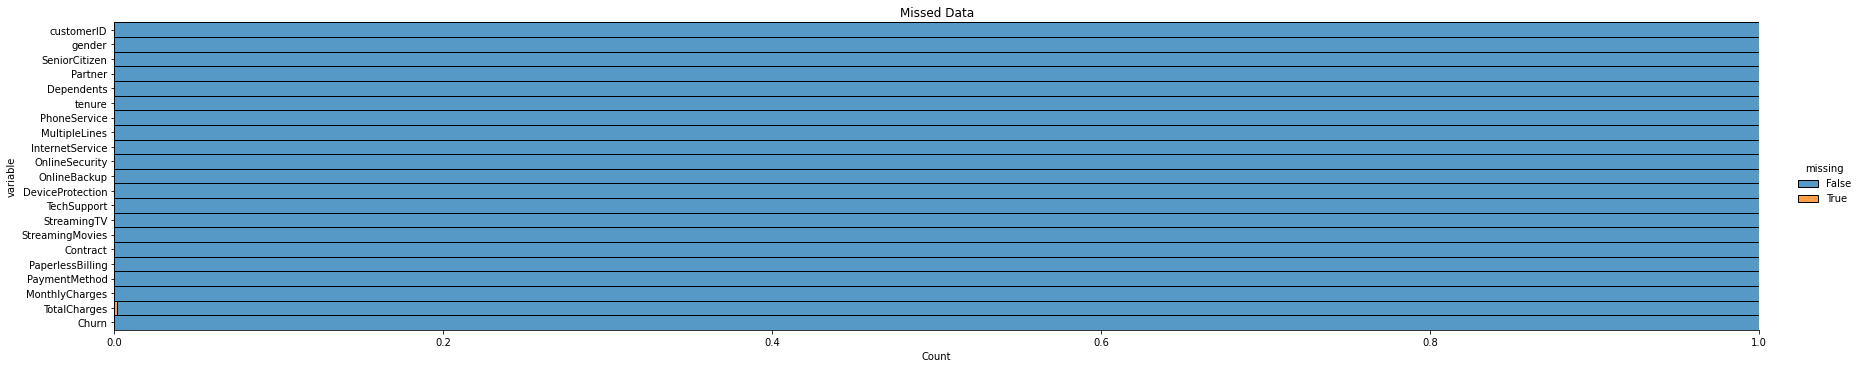

In [7]:
#dispplot to visualized each column to see any miiising values are there
sns.displot(data=d.isna().melt(value_name="missing"),y="variable",hue="missing",multiple="fill", aspect=5);
plt.title('Missed Data')

**If you see before the converting Total Charges in numerical, no missing values but after converted into numerical some missing values seen in a plot.**

# Check total number of missing values in columns

In [8]:
#sum of total no. of null values in each columns
d.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

**Total Charges having 11 null values so we can drop these values.**

# Dimensional Reduction : Part 1
- Drop missing value rows 
- Drop a redundant column - CustomerID

In [9]:
#drop misssing rows and unwanted column
d.dropna(inplace=True)
d.drop(columns='customerID', inplace=True)

#let's inspecting datset if any redundant part or missing values exist in dataset
d.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# Creating Independent and Dependent variable

**X have all independent features for modelling and prediction.**

In [10]:
#asiigning x for selecting independent features
x=d.iloc[0:,:19]
x.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer,42.30,1840.75
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65


# Creating target column 

In [11]:
#assign y as dependent feature(churn)
y=d.iloc[0:,19:]
y.head()

,Churn
0,No
1,No
2,Yes
3,No
4,Yes


# Creating Numerical and categorical variable

In [12]:
#num varible assigning for numerical columns
num=x.select_dtypes("number").columns

#cat varible assigning for categorical columns
cat=x.select_dtypes("object").columns
cat_=d[cat]
#print num and cat columns
print("numerical columns : ",num)
print("\ncategorical columns : ", cat)

numerical columns :  Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

categorical columns :  Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')


# ***Data Visualization***
****

# Inspecting target column

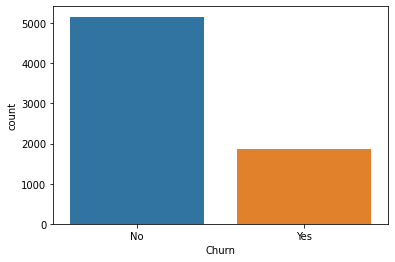

In [13]:
sns.countplot(x=y['Churn'])

- **'No' represent no of non-churner whose not much coustomer maintained relationship, and 'Yes' represent no. of customer maintained relationship.**

- **'No' has high raised as compared to 'Yes'.**



# Visualize categorical features

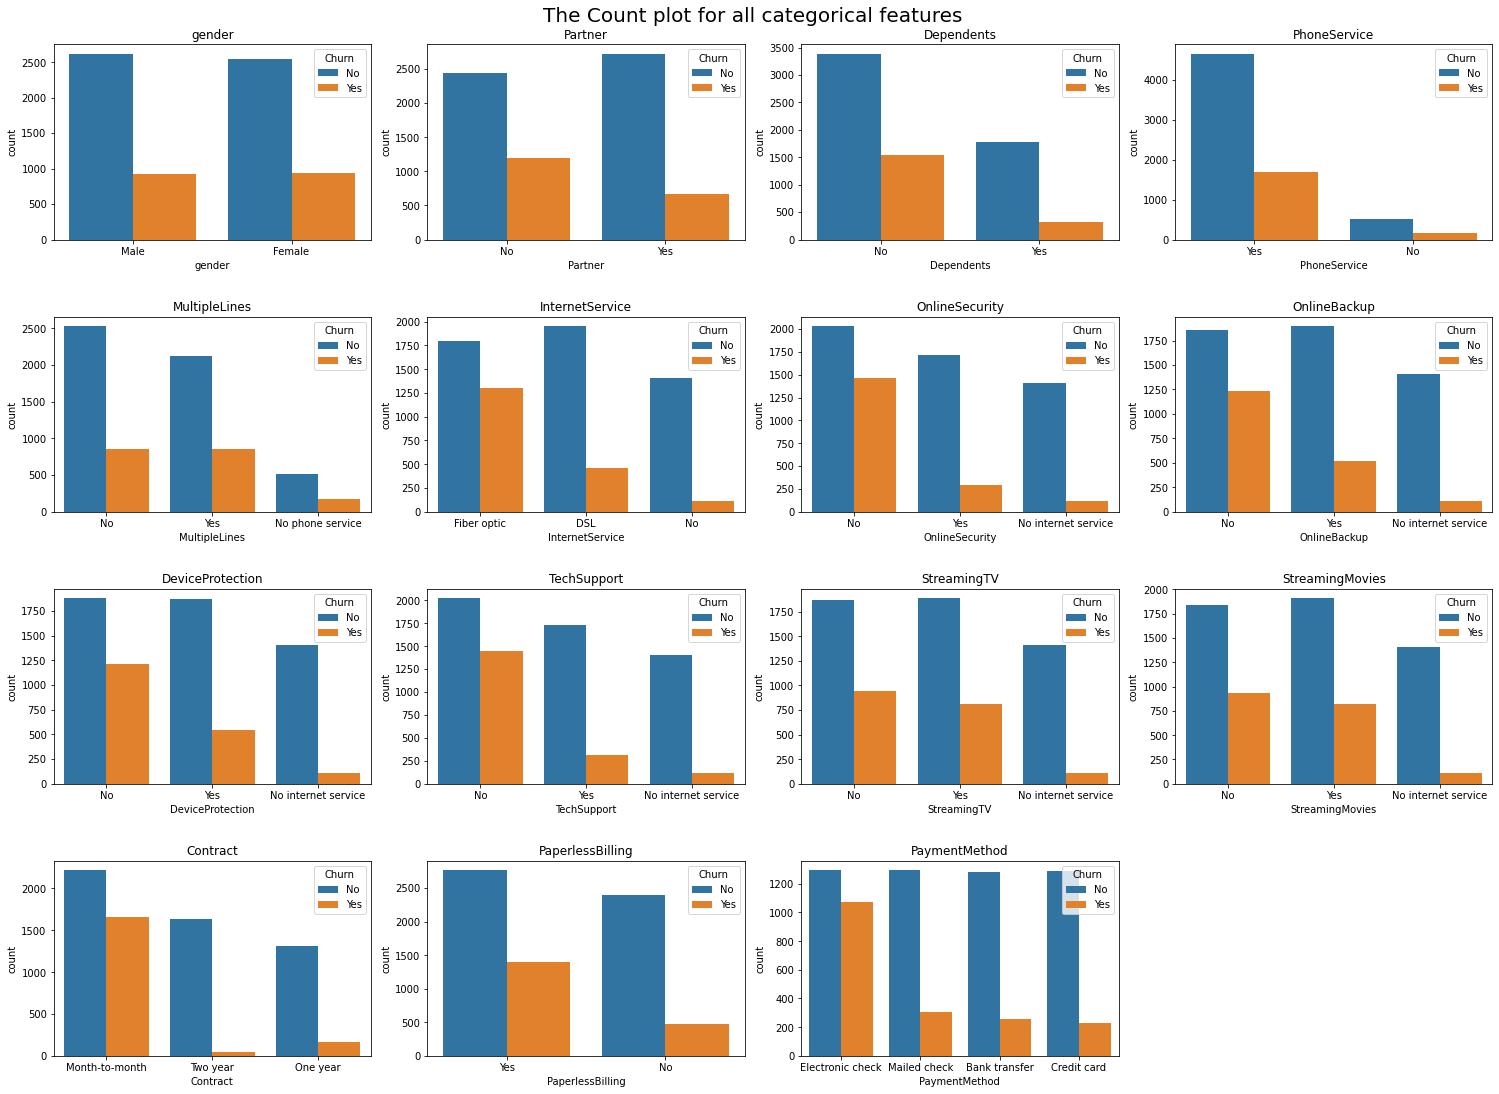

In [14]:
# visualize countplot for categorical 
figure = plt.figure(figsize = (21,15))
for i, col in enumerate(cat): 
        ax = plt.subplot(4, 4, i+1)
        sns.countplot(x=x[col], hue=y['Churn'], order=x[col].value_counts().index)
        plt.title(col)
figure.tight_layout(h_pad=3.0, w_pad=0.5)
figure.suptitle('The Count plot for all categorical features', fontsize=20, y=1.01)
plt.show()

- Female and male have some count of yes/no.If you see no more no. male churns or female churns as compared to each other.It clealy seen gender is not much affect on churning action.
- Partner , non-churner have more partners as compared to churner out of 3393.
- Very less no. of churner are dependend as compared to non churner. 
- Both churner and non churner have phone services.
- No mutlple lines are used both churner and non churner.
- Churner have larger number(total no. 3096)  of ofc internet servicesthan other internet service.
- Many people not used any intern online security.
- Churner not used online backup, tech support & device protection and but as compared to non churner high rised peak as compared to churner for not using backup, tech support & device protection.
- Streming tv and moives is depende on they have internet service or not but we can see in a both graph show same result.Churner used less streming tv and movies as compared to non-churner.
- Montly contract churner are less compared to non-churner.1500- 1600 churner have monthly contract but 2000+ non-churner have monthly contract.Means mostly people used one month not for longer time.
very few churner have one year and two year contract.

- Mostly Electronic check churner used to payment.

# Visualize numerical features

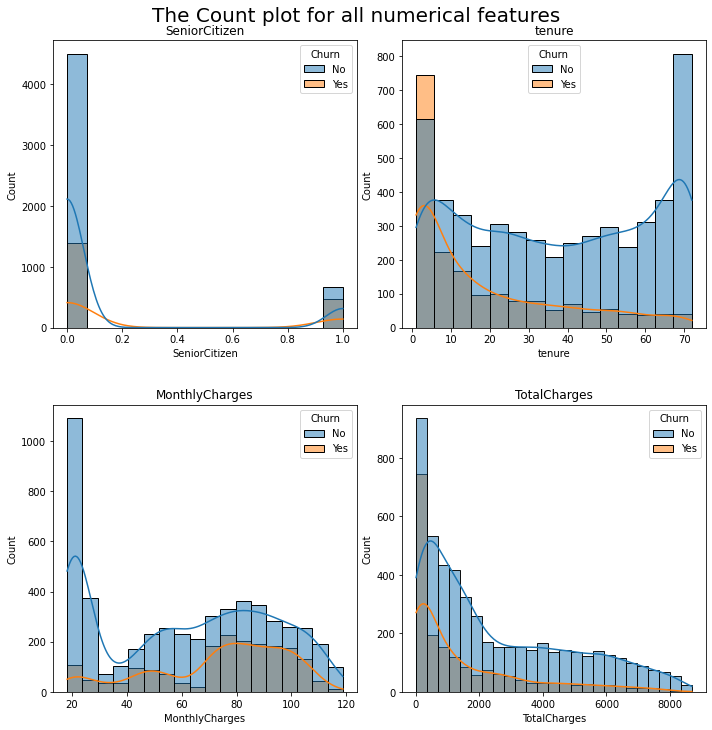

In [15]:
# visualize countplot of numerical features
figure = plt.figure(figsize = (10,10))
for i, col in enumerate(num): 
        ax = plt.subplot(2,2, i+1)
        sns.histplot(x=x[col], hue=y['Churn'],kde=True)
        plt.title(col)
figure.tight_layout(h_pad=3.0, w_pad=0.5)
figure.suptitle('The Count plot for all numerical features', fontsize=20, y=1.01)
plt.show()

- Both Churner and non-churners are very less senior citizens.i.e. out of 7043 only 1142 are senior citizens are part of telco.
- If you see clearly only churner have 5 months long tenure with telco, which almost reached 750 total count.And range of months the non-churner has stayed with the company is varied between 1 to 75 months.
- Monthly charges for churner less fluctaute.
- Non churner with high total charges are less likely to leave the company.


- Our dataset is not followed normaildistribution so we can handle during feature engineering.

# Visualize Outilers 

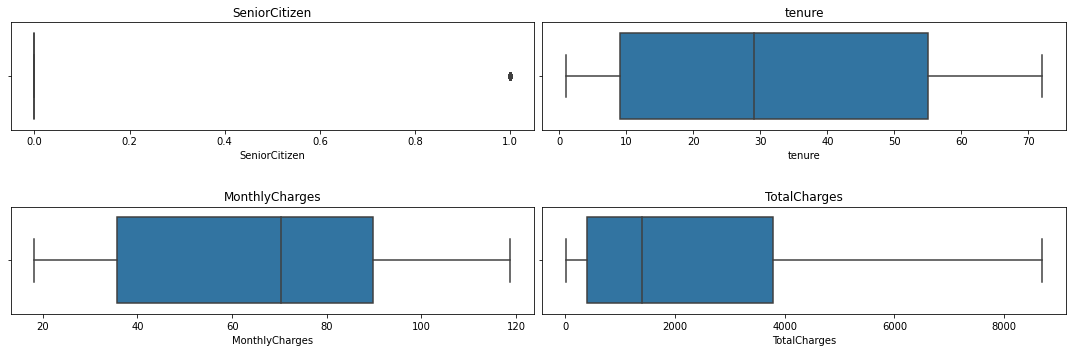

In [16]:
#plot any outlilers exist in 
figure = plt.figure(figsize = (15,5))
for i, col in enumerate(num): 
        ax = plt.subplot(2, 2, i+1)
        sns.boxplot(ax=ax, data=d,x=d[col])
        plt.title(col)
figure.tight_layout(h_pad=3.0, w_pad=0.5)
plt.show()

**No outlier detect in data set so, no outlier handling required.**

# ***Feature Selection*** 
****

Feature selection is the process of reducing the number of input variables when developing a predictive model.

It is desirable to reduce the number of input variables to both reduce the computational cost of modeling and, in some cases, to improve the performance of the model.

# Mutual Information for feature selection
- Mutual Information measures the entropy drops under the condition of the target value. 

- The MI score will fall in the range from 0 to ∞. The higher value, the closer connection between this feature and the target, which suggests that we should put this feature in the training dataset. If the MI score is 0 the low score suggests a weak connection between this feature and the target.

In [17]:
#feature importance for feature selection
def compute_mutual_information(cat):
    return mutual_info_score(cat, d.Churn)

# select categorial variables excluding the response variable 
categorical_variables = d.select_dtypes(include=object).drop('Churn', axis=1)

# compute the mutual information score between each categorical variable and the target
feature_importance = categorical_variables.apply(compute_mutual_information).sort_values(ascending=False)

# visualize feature importance
print(feature_importance)

Contract            0.098182
OnlineSecurity      0.064528
TechSupport         0.062873
InternetService     0.055394
OnlineBackup        0.046659
PaymentMethod       0.044423
DeviceProtection    0.043784
StreamingMovies     0.031918
StreamingTV         0.031803
PaperlessBilling    0.019119
Dependents          0.014270
Partner             0.011383
MultipleLines       0.000798
PhoneService        0.000069
gender              0.000037
dtype: float64


**Using matual information score we see can feature importance towards te target. So, gender and phone service have very low scores as compared to other.**

# Visualize Features Importance

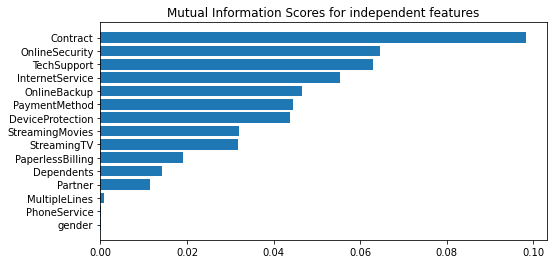

In [18]:
#plot the mutual info. score for independent features 
def plot_mi_scores(feature_importance):
    scores = feature_importance.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores for independent features")

plt.figure(figsize=(8, 4))
plot_mi_scores(feature_importance)

**Here, after visualized the feature importance using mutal info. score. Phone service and gender are almost 0 which shows the not strong relationship with target column churn. It gives very less informative for modelling and predicting target. So we can remove redundent columns.**

# Dimesional Redection : Part 2

In [19]:
#drop columns
x.drop(['gender','PhoneService'], axis=1, inplace=True)
#check columns after dropping
x.columns

Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges'],
      dtype='object')

# ***Feature Engineering***
****
Feature engineering is a machine learning technique that leverages data to create new variables that aren’t in the training set. It can produce new features for both supervised and unsupervised learning, with the goal of simplifying and speeding up data transformations while also enhancing model accuracy. Feature engineering is required when working with machine learning models.

# Label Encoding
Label encoding is used to replace categorical values with numerical values. This encoding replaces every category with a numerical label.

In [20]:
dt = x.copy()

#replace data Yes to 1 and No to 0
dt = dt.replace(['Yes', 'No'], [1, 0])
y=y.replace(['Yes', 'No'], [1, 0])
dt.head() 

,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,1,0,1,No phone service,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85
1,0,0,0,34,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50
2,0,0,0,2,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15
3,0,0,0,45,No phone service,DSL,1,0,1,1,0,0,One year,0,Bank transfer,42.30,1840.75
4,0,0,0,2,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65


# One-Hot Encoder
Though label encoding is straight but it has the disadvantage that the numeric values can be misinterpreted by algorithms as having some sort of order in them. This ordering issue is addressed in another common alternative approach called ‘One-Hot Encoding’. In this strategy, each category value is converted into a new column and assigned a 1 or 0 (notation for true/false) value to the column.

In [21]:
# one-hot encoding (categorical variables with more than two levels)
one_hot_encoding_columns = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                            'TechSupport', 'StreamingTV',  'StreamingMovies', 'Contract', 'PaymentMethod']

# encode categorical variables with more than two levels using one-hot encoding
df_telco_transformed = pd.get_dummies(dt, columns = one_hot_encoding_columns)

#Inspect columns
df_telco_transformed.columns

Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PaperlessBilling',
       'MonthlyCharges', 'TotalCharges', 'MultipleLines_0', 'MultipleLines_1',
       'MultipleLines_No phone service', 'InternetService_0',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'OnlineSecurity_0', 'OnlineSecurity_1',
       'OnlineSecurity_No internet service', 'OnlineBackup_0',
       'OnlineBackup_1', 'OnlineBackup_No internet service',
       'DeviceProtection_0', 'DeviceProtection_1',
       'DeviceProtection_No internet service', 'TechSupport_0',
       'TechSupport_1', 'TechSupport_No internet service', 'StreamingTV_0',
       'StreamingTV_1', 'StreamingTV_No internet service', 'StreamingMovies_0',
       'StreamingMovies_1', 'StreamingMovies_No internet service',
       'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Bank transfer', 'PaymentMethod_Credit card',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed chec

# Checking target incidence

In [22]:
#count uniques values in churn 
("Checking target incident ones's and zeros \n" , round(y.value_counts(normalize= True),3))

("Checking target incident ones's and zeros \n", Churn
 0        0.734
 1        0.266
 dtype: float64)

**0's are 73.4 percent and 1's are 26.6 percent. Our data is imbalanced, it need to handle imbalanced data. So many techniques are to handle. But we SMOTE sampling. SMOTE or Synthetic Minority Oversampling Technique is an oversampling technique but SMOTE working differently than your typical oversampling.**

**In a classic oversampling technique, the minority data is duplicated from the minority data population. While it increases the number of data, it does not give any new information or variation to the machine learning model.**

# Imbalanced data handling

In [23]:
#minority smapling
smot = SMOTE(sampling_strategy='minority') 
x_t, y_t = smot.fit_resample(df_telco_transformed, y) 
print("Before sampling number of ones and zeros in target?\n" ,y.value_counts())
print("\nAfter sampling number of ones and zeros in target?\n" ,y_t.value_counts())

Before sampling number of ones and zeros in target?
 Churn
0        5163
1        1869
dtype: int64

After sampling number of ones and zeros in target?
 Churn
0        5163
1        5163
dtype: int64


**Now , our data is balanced so we foraward to next step.**

**If you remeber numerical histogram plot - tenure, MontlyCharges, and TotalCharges are not follwed normal distribution.We will use the min-max method to rescale the numeric columns (tenure, MontlyCharges, and TotalCharges) to a common scale.The min-max approach (often called normalization) rescales the feature .**

# Data Normalization
It is a common practice in machine learning which consists of transforming numeric columns to a common scale. In machine learning, some feature values differ from others multiple times. The features with higher values will dominate the learning process; however, it does not mean those variables are more important to predict the target. Data normalization transforms multiscaled data to the same scale. After normalization, all variables have a similar influence on the model, improving the stability and performance of the learning algorithm.

In [24]:
#normailizing our dataset using min max scaler
scaler = MinMaxScaler()
model = scaler.fit(x_t)
x_t = model.transform(x_t)

# Splitting dataset into train and test datasets

In [25]:
# split the data in training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x_t, y_t, test_size=0.25, stratify=y_t
                                                    )
#check shape of data set
print("Training input feature shape",X_train.shape)
print("Testing input feature shape",X_test.shape)
print("Training output feature shape",y_train.shape)
print("Testing output feature shape", y_test.shape)

Training input feature shape (7744, 38)
Testing input feature shape (2582, 38)
Training output feature shape (7744, 1)
Testing output feature shape (2582, 1)


# ***Model Evaluation***
****
Algorithm selection is a key challenge in any machine learning project since there is not an algorithm that is the best across all projects. Generally, we need to evaluate a set of potential candidates and select for further evaluation those that provide better performance.

 *  k nearest neighbors
 *  logistic regression
 *  Support Vector Classifier
 *  Random forest
 *  Gradient boosting
 *  Linear SVC
 *  Bagging Classifier
 *  AdaBoost Classifier
 *  XGB Classifier
Confusion Matrix for different models


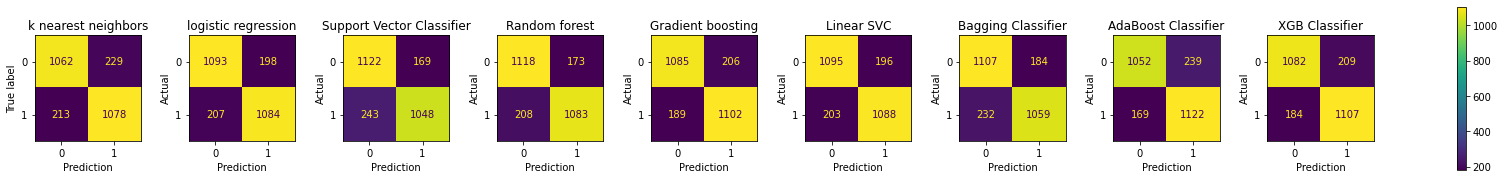

,run_time,CV_Score,X_train_Pred_Acc,X_test_Pred_Acc,Roc_Auc_Score
Gradient boosting,0.11,0.854596,0.867510,0.847018,0.847018
XGB Classifier,0.05,0.853822,0.864540,0.847792,0.847792
Random forest,0.06,0.849819,0.998321,0.852440,0.852440
logistic regression,0.01,0.849303,0.850594,0.843145,0.843145
Support Vector Classifier,0.15,0.848658,0.863249,0.840434,0.840434
Linear SVC,0.01,0.848141,0.849303,0.845469,0.845469
AdaBoost Classifier,0.03,0.845815,0.846462,0.841983,0.841983
Bagging Classifier,0.02,0.842588,0.987732,0.838885,0.838885
k nearest neighbors,0.07,0.829804,0.881457,0.828815,0.828815


In [52]:
import time
models = {    
'k nearest neighbors': KNeighborsClassifier(),
'logistic regression': LogisticRegression(),
'Support Vector Classifier': SVC(),
'Random forest': RandomForestClassifier(),
'Gradient boosting': GradientBoostingClassifier(),
'Linear SVC': LinearSVC(),
'Bagging Classifier': BaggingClassifier(),
'AdaBoost Classifier': AdaBoostClassifier(),
'XGB Classifier': XGBClassifier(),
}

res = {}
with warnings.catch_warnings():
    warnings.simplefilter("ignore")

f, axes = plt.subplots(1, 9, figsize=(30,3))

for i, (name, model) in enumerate(models.items()):
    n = name + " "     
    print(" * ",name)
    
    start_time = time.time()
    # fit the model with the training data
    clf = model.fit(X_train,y_train)
    # predict the target on train and test data
    y_pred_tr = model.predict(X_train)
    y_pred_ts = model.predict(X_test)
    #cross-validation score
    Cross_Validation_Score = cross_val_score(clf, X_train, y_train, cv=5).mean()
    #accuracy
    acc_pred_tr = np.mean(accuracy_score(y_train,y_pred_tr))
    acc_pred_ts = np.mean(accuracy_score(y_test,y_pred_ts))
    #RMS value
    #roc auc on test data
    Roc_Auc_Score =  roc_auc_score(y_test, y_pred_ts)

    #result
    res[n] = {
            'run_time': format(round((time.time() - start_time)/60,2)),
            "CV_Score": Cross_Validation_Score ,
            "X_train_Pred_Acc":acc_pred_tr,
            "X_test_Pred_Acc":acc_pred_ts,
            "Roc_Auc_Score":Roc_Auc_Score,
           }

    #plotting confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred_ts)
    disp = ConfusionMatrixDisplay(cf_matrix)
    disp.plot(ax=axes[i])
    disp.ax_.set_title(name)
    disp.im_.colorbar.remove()
    disp.ax_.set_xlabel('Prediction')
  
    if i!=0:
        disp.ax_.set_ylabel('Actual')
    
plt.subplots_adjust(wspace=0.45, hspace=0.1)
f.colorbar(disp.im_, ax=axes)
print("Confusion Matrix for different models")
plt.show()

results = pd.DataFrame.from_dict(res, orient="index")
results = results[['run_time',"CV_Score",'X_train_Pred_Acc','X_test_Pred_Acc','Roc_Auc_Score']]

results.sort_values(by='CV_Score', ascending=False)

**After Evalution Gradient boosting classifier gives overall better performance in Crossvalidation, accuracy and roc-auc too.**

**we will only further evaluate the model that presents higher accuracy using the default hyperparameters. As shown above, this corresponds to the gradient boosting model which shows an CV Score of nearly 85.4%.**

- So we move to next step for hyperparameter tuning.

# ***Hyperparameter tuning***
****

we used drid search for hyperparameter tuning.

In [48]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [80, 90, 100],
                   'max_depth': [3, 4, 5, 6],
                   'max_features': [None, 'auto', 'sqrt', 'log2'], 
                   'min_samples_split': [2, 3, 4, 5]
}
# Create a based model
gd = GradientBoostingClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = gd, param_grid = param_grid, 
                          cv = 2, n_jobs = -1, verbose = 3)
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 2 folds for each of 192 candidates, totalling 384 fits


GridSearchCV(cv=2, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6],
                         'max_features': [None, 'auto', 'sqrt', 'log2'],
                         'min_samples_split': [2, 3, 4, 5],
                         'n_estimators': [80, 90, 100]},
             verbose=3)

In [49]:
print(grid_search.best_estimator_)

GradientBoostingClassifier(max_depth=6, min_samples_split=3, n_estimators=80)


# ***Final Model Building and Evalution***

****

Accuracy of HP MODEL :  0.8516653756777691
Classification report : 
               precision    recall  f1-score   support

           0       0.84      0.87      0.85      1291
           1       0.86      0.84      0.85      1291

    accuracy                           0.85      2582
   macro avg       0.85      0.85      0.85      2582
weighted avg       0.85      0.85      0.85      2582



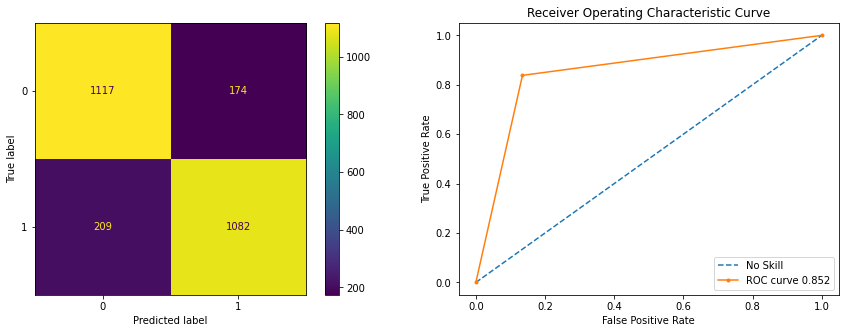

In [126]:
#model building
model_hp = GradientBoostingClassifier(max_depth=6,
                           min_samples_split=3, n_estimators=80)
model_hp.fit(X_train, y_train)
y_pred_hp=model_hp.predict(X_test)
print("Accuracy of HP MODEL : ", np.mean(accuracy_score(y_test, y_pred_hp)))
print("Classification report : \n", classification_report(y_test, y_pred_hp))


#plot_confusion_matrix
plt.subplots(figsize=(15,5))
ax=plt.subplot(1, 2, 1)
plot_confusion_matrix(model_hp, X_test, y_test ,ax=ax)
plt.show


plt.subplot(1, 2, 2)
# calculate roc curve for model
pyplot.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
fpr, tpr,thresholds = roc_curve(y_test, y_pred_hp)
roc_auc = auc(fpr, tpr)
#print("ROC AUC : {:.3f}%".format(roc_auc*100))
# plot model roc curve
pyplot.plot(fpr, tpr, marker='.', label='ROC curve %0.3f' % roc_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title("Receiver Operating Characteristic Curve")
# show the legend
pyplot.legend(loc=4)
# show the plot
pyplot.show()



# ***Conclusion***
****
-  we have walked through Telco customer Churn dataset. We started by cleaning the data , dimensional reduction and analyzing it with visualization. 
- In a next step - Feature extraction, feature engineering and noramalization od datset for better accuracy and avoid overfiting.
- After transforming the data, we tried 9 different machine learning algorithms using default parameters.Here we can conclude Gradient Bossting Classifier Giver overall good Cross validation score and model overall accuracy.
- After Hyper parameter , model performance slightly increase approx 85.166 percent .
And also imporve roc-auc score after tuning the model.